In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'1.13.1'

wczytywanie danych

In [0]:
from google.colab import files
uploaded = files.upload()

Saving norm_train_setOK.csv to norm_train_setOK (13).csv


In [0]:
import io
learning_set = pd.read_csv(io.BytesIO(uploaded['norm_train_setOK.csv']))

SIEĆ

In [0]:
tf.reset_default_graph()

In [0]:
width = 100
height = 100

inicjalizacja neuronów wyjściowych (zmienna)

In [0]:
weights_last_iter = tf.placeholder(dtype=tf.float32)
weights = tf.Variable(np.random.rand(width, height, 23), dtype=tf.float32)
weights_assigned = weights.assign(weights_last_iter)

Instructions for updating:
Colocations handled automatically by placer.


 liczymy dystans 
*   wszystkie dane w <0,1>

In [0]:
input_data = tf.placeholder(tf.float32, name="input_data")
dist = (tf.math.reduce_sum((input_data - weights)**2, axis = -1))**(1/2)

TensorBoard

In [0]:
# !pip install tensorboardcolab

# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

# tbc=TensorBoardColab()


In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
test_win = tf.math.reduce_min(dist)
winner_cor = tf.dtypes.cast(tf.where(tf.equal(dist, tf.math.reduce_min(dist))), tf.float32)

In [0]:
cors_tf = tf.constant(np.indices((width, height)), dtype=tf.float32)
cors_tf = tf.transpose(cors_tf, [1,2,0])

In [0]:
diff_tf = cors_tf - (winner_cor[0])

distance_tf_squared = tf.math.reduce_sum((diff_tf)**2, axis = -1)
distance_tf = (distance_tf_squared)**(1/2)

sigma_t

In [0]:
#numer iteracji t
t = tf.placeholder(dtype = tf.float32)

#wyjściowa wartość
sigma0 = tf.placeholder(dtype = tf.float32)
time_const = tf.placeholder(dtype = tf.float32)

sigma_t = sigma0 * tf.math.exp(-(t/time_const))

funkcje sąsiedztwa

In [0]:
theta_t = tf.math.exp(-(distance_tf_squared)/(2*sigma_t**2))
theta_t = tf.dtypes.cast(tf.expand_dims(theta_t, -1), tf.float32)

learning rate

In [0]:
L0 = tf.placeholder(dtype=tf.float32)
learning_rate = L0 * tf.math.exp(-(t/time_const))

zmiana wag

In [0]:
weights_updated = weights + theta_t*learning_rate*(input_data - weights)

In [0]:
import time  
import tracemalloc

błąd [%]:  8.273381294964032
błąd [%]:  8.992805755395683
błąd [%]:  11.151079136690644
błąd [%]:  11.151079136690644
błąd [%]:  9.712230215827333
błąd [%]:  10.79136690647482
błąd [%]:  7.5539568345323715
błąd [%]:  8.273381294964032
błąd [%]:  8.273381294964032
błąd [%]:  6.474820143884896
błąd [%]:  6.1151079136690605
błąd [%]:  5.755395683453235
błąd [%]:  6.1151079136690605
błąd [%]:  5.755395683453235
błąd [%]:  6.1151079136690605
błąd [%]:  5.755395683453235


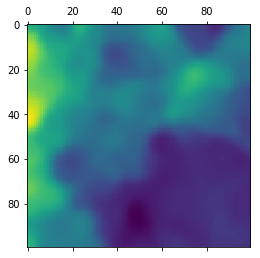

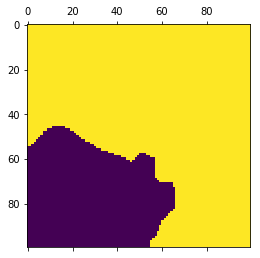

czułość [%]:  90.9090909090909
specyficzność [%]:  100.0
dokładność [%]:  94.24460431654677
błąd [%]:  5.755395683453235
Błędy:  [8.273381294964032, 8.992805755395683, 11.151079136690644, 11.151079136690644, 9.712230215827333, 10.79136690647482, 7.5539568345323715, 8.273381294964032, 8.273381294964032, 6.474820143884896, 6.1151079136690605, 5.755395683453235, 6.1151079136690605, 5.755395683453235, 6.1151079136690605, 5.755395683453235]
1337.195031
Current: 1366432, Peak 7445304


In [0]:
start = time.clock()
tracemalloc.start()
#hyperparameters - nie ulegają uczeniu, ustalamy sami stałe

L0_value = 0.8
sigma0_value = 30
time_const_val = 3000

#Funkcja ucząca - argument wejściowy liczba iteracji uczących

def learn(epochs):
  current_weights = np.random.rand(width, height, 23)
  current_theta_t = []
  current_lt = []
  initial_t = 1
  for i in range(1,epochs):
    tmp_weights = []
    last_weights = current_weights

    _, current_weights, current_theta_t, current_lt, distances = sess.run((weights_assigned, weights_updated, theta_t, learning_rate, dist), feed_dict = {input_data: learning_set.iloc[np.random.randint(0,learning_set.iloc[:,0].count()),3:27].values, t: [initial_t], weights_last_iter: current_weights, L0: L0_value, sigma0: sigma0_value, time_const: time_const_val})

    initial_t += 1
  return distances, current_weights

#funkcja sprawdzająca, czy pacjent cierpi na chroniczną niewydolność nerek

def check_if_ckd(truth_matrix, inputt):
  bmu = sess.run((winner_cor), feed_dict = {input_data: inputt, t: [1], weights_last_iter: learnt, L0: 1, sigma0: 1, time_const: 1})
  bmux = int(bmu[0][0])
  bmuy = int(bmu[0][1])
  return truth_matrix[bmux, bmuy]
  
def bmu_check(inputt):
  bmu = sess.run((winner_cor), feed_dict = {input_data: inputt, t: [1], weights_last_iter: learnt, L0: 1, sigma0: 1, time_const: 1})
  return bmu

#print(current_theta_t[:,:,0].shape, current_lt, current_weights[0,0,0])
  
#plt.matshow(current_theta_t[:,:,0])
# size = 8
# plt.figure(figsize = (4*size,4*size))
# for epochy in range(1, size):
#    for lambdy in range(1, size):
#       print(epochy, lambdy)
#       plt.subplot(size, size, epochy*size + lambdy )
#       plt.imshow(learn(epochy, lambdy))
# plt.show()

epoch_list = [10, 20, 40, 50, 80, 100, 400, 700, 1000, 5000, 8000, 12000, 20000, 35000, 50000, 80000]
error = []

for iters in epoch_list:
  _, learnt = learn(iters)
  #plt.matshow(np.sum(learnt,axis=-1))

  #plt.show()

  #learnt
  distances_ckd = []
  distances_nckd = []
  ckd_counter = 0
  nckd_counter = 0
  for i in range(0, learning_set.iloc[:,0].count()):
    data_out = sess.run((dist), feed_dict = {input_data: learning_set.iloc[i,3:27].values, t: [1], weights_last_iter: learnt, L0: 1, sigma0: 1, time_const: 1})
    if learning_set.iloc[i,1] == 'ckd':
      ckd_counter+=1
      distances_ckd.append(data_out)
    else:
      nckd_counter+=1
      distances_nckd.append(data_out)

  distances_ckd = np.sum(distances_ckd, axis=0)/ckd_counter
  distances_nckd = np.sum(distances_nckd, axis=0)/nckd_counter 
  #plt.matshow(distances_ckd)
  #plt.matshow(distances_nckd)
  ckd_nckd = np.fromfunction(lambda i, j: distances_ckd[i,j] < 2*distances_nckd[i,j] , (width,height), dtype=int)
  #plt.matshow(ckd_nckd)

  # TP - wyniki prawdziwie dodatnie (ang. true positive)
  # FP - wyniki fałszywie dodatnie (ang. false positive)
  # FN - wyniki fałszywie ujemne (ang. false negative)
  # TN - wyniki prawdziwie ujemne (ang. true negative)
  TP = 0
  FP = 0
  FN = 0
  TN = 0

  ckd_data = learning_set.iloc[:ckd_counter,:]
  nckd_data = learning_set.iloc[ckd_counter:,:]

  for personCKD in range(1,ckd_counter):
    patient1 = ckd_data.iloc[personCKD,3:27].values
    check = check_if_ckd(ckd_nckd, patient1)
    if check == True:
      TP += 1
    else:
      FN += 1

  for personNCKD in range(1,nckd_counter):
    patient2 = nckd_data.iloc[personNCKD,3:27].values
    check = check_if_ckd(ckd_nckd, patient2)
    if check == True:
      FP += 1
    else:
      TN += 1

  sensitivity = TP/(TP+FN)*100
  specificity = TN/(FP+TN)*100
  acc = (TP+TN)/(TP+TN+FP+FN)*100
  err = (1-(TP+TN)/(TP+TN+FP+FN))*100
  print("błąd [%]: ", err)
  error.append(err)

plt.matshow(np.sum(learn(8000)[1],axis=-1))
plt.matshow(ckd_nckd)
plt.show()
print("czułość [%]: ", sensitivity)
print("specyficzność [%]: ", specificity)
print("dokładność [%]: ", acc)
print("błąd [%]: ", err)

print("Błędy: ", error)

print(time.clock() - start)
print("Current: %d, Peak %d" % tracemalloc.get_traced_memory())

# patient = (learning_set.iloc[180,3:27].values)
# print(learning_set.iloc[180,3:27].values)
# print(bmu_check(patient))
# print(check_if_ckd(ckd_nckd, patient))



wykres błędu

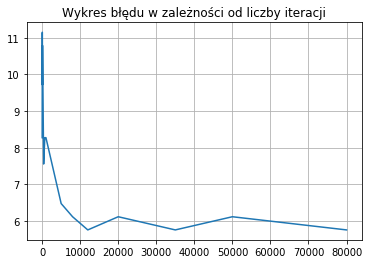

In [0]:
plt.plot(epoch_list, error)
plt.title('Wykres błędu w zależności od liczby iteracji')
plt.grid(True)

In [0]:
# writer = tbc.get_writer()
# writer.add_graph(tf.get_default_graph())
# writer.flush()

wyniki

In [0]:
patient = (learning_set.iloc[50,3:27].values)
check = check_if_ckd(ckd_nckd, patient)
if check == True:
  print("Pacjent chory")
else:
  print("Pacjent zdrowy")

Pacjent chory
